In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import random
%matplotlib inline

In [3]:
from rbfxor.modeling import BaseMLP
from rbfxor.functional import PiecewiseRBF
from rbfxor.dataset import XORDataset, true_xor

## Setting up pytorch-lightning

INFO:root:       Name          Type Params
0    layers    Sequential   33  
1  layers.0        Linear   24  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    9  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 259.38batch/s, batch_nb=15, loss=0.197, v_nb=212]


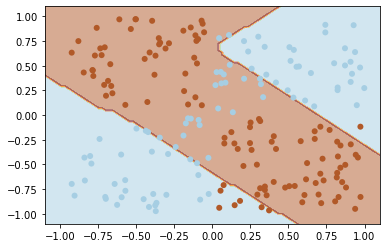

In [5]:
from pytorch_lightning import Trainer

ds_train = XORDataset(10)
ds_test = XORDataset(100)

# model = BaseMLP([8], nn.ReLU(), nn.Sigmoid())
model = BaseMLP([8], PiecewiseRBF(T=0.01, rbf_at_0=0.6, ep2=0.6), nn.Sigmoid())
trainer = Trainer()
trainer.fit(model)
model.plot('val')

## Path Forward

- Can a single layer perceptron (SLP) learn the XOR function with a sigmoid?
- Can a SLP learn the XOR with a ReLU
- Can a MLP learn the XOR?

- Can a SLP learn the XOR function with a hardcoded DoubleRBF activation function?
- Can a SLP learn the XOR function with a trainable DoubleRBF activation function?

Still to code:
- Plot the decision map of the trained model (in blue/red), under all the data points of the dataset
- Can I show a decision boundary?